# <center>INFO-F422: Statistical foundations of machine learning</center>

# <center>Project II. Classification</center>

Student: Hongxing NIU

Matricule ULB: 000342366

Specialized Master in data science, Big data (MS-BGDA), Université Libre de Bruxelles

Python version: 3.6

Date: June-6,2019

### In this classification project, I train a decision tree classifier and a random forest classifier. I will do so on both synthetic and real data.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree        # For DecisionTreeClassifier class
import sklearn.ensemble    # For RandomForestClassifier class
import sklearn.datasets    # For make_circles
import sklearn.metrics     # For accuracy_score

## <center>Part I. Synthetic data sets</center>

Apply scikit-learn's decision tree classifier (**sklearn.tree.DecisionTreeClassifier**) and random forest classifier (**sklearn.ensemble.RandomForestClassifier**]) to synthetic data.

## 1. Generating synthetic datasets
**Run the code cell below to define some useful functions for plotting data and predictions.**

In [3]:
def plot_data(X, y):
    """Plots a toy 2D data set. Assumes values in range [-3,3] and at most 3 classes."""
    plt.plot(X[y==0,0], X[y==0,1], 'ro', markersize=6)
    plt.plot(X[y==1,0], X[y==1,1], 'bs', markersize=6)
    plt.plot(X[y==2,0], X[y==2,1], 'gx', markersize=6, markeredgewidth=2)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.gca().set_aspect('equal')
    
def plot_predict(model):
    """
    Plots the model's predictions over all points in range 2D [-3, 3].
    Assumes at most 3 classes.
    """
    extent = (-3, 3, -3, 3)
    x1min, x1max ,x2min, x2max = extent
    x1, x2 = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))
    X = np.column_stack([x1.ravel(), x2.ravel()])
    y = model.predict(X).reshape(x1.shape)
    cmap = matplotlib.colors.ListedColormap(['r', 'b', 'g'])
    plt.imshow(y, extent=extent, origin='lower', alpha=0.4, vmin=0, vmax=2, cmap=cmap)
    plt.xlim([x1min, x1max])
    plt.ylim([x2min, x2max])
    plt.gca().set_aspect('equal')
    
def plot_class_probability(model, class_index):
    """
    Plots the model's class probability for the given class {0,1,2}
    over all points in range 2D [-3, 3]. Assumes at most 3 classes.
    """
    extent = (-3, 3, -3, 3)
    x1min, x1max ,x2min, x2max = extent
    x1, x2 = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))
    X = np.column_stack([x1.ravel(), x2.ravel()])
    p = model.predict_proba(X)[:,class_index].reshape(x1.shape)
    colors = [[1, 0, 0], [0, 0, 1], [0, 1, 0]]
    cmap = matplotlib.colors.ListedColormap(np.linspace([1, 1, 1], colors[class_index], 50))
    plt.imshow(p, extent=extent, origin='lower', alpha=0.4, vmin=0, vmax=1, cmap=cmap)
    plt.xlim([x1min, x1max])
    plt.ylim([x2min, x2max])
    plt.gca().set_aspect('equal')   

## 2. Machine Learning Algorithms

### 2.1. ML-algorithm 1: the decision tree-- CART Algorithm

The Classification And Regression Tree (CART) algorithm was developed by Breiman et al (1984).  A CART tree is a
binary decision tree that is constructed by splitting a node into two child nodes repeatedly, beginning with the root node that contains the whole learning sample.
This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node. For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree. The complete process can be better understood using the below algorithm:

    Step1: Begin the tree with the root node, says S, which contains the complete dataset. 
    Step2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
    Step3: Divide the S into subsets that contains possible values for the best attributes.
    Step4: Generate the decision tree node, which contains the best attribute.
    Step5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

![title](img/Decision_Tree_2.png)
[Source: https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/]

### The cost function that the algorithm tries to minimize is given by:

![title](img/CART.png)


Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the *max_depth* hyperparameter), or if it cannot find a split that will reduce impurity. A few other hyperparameters control additional stopping conditions (*min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes*).

The CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the
process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.

### 2.2. ML-algorithm 2: the RandomForest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.
The general method of random decision forests was first proposed by Ho in 1995.

*How are Random Forests trained?*

Random forest is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting), typically with *max_samples* set to the size of the training set. Bagging or Bootstrap Aggregating, consists of randomly sampling subsets of the training data, fitting a model to these smaller data sets, and aggregating the predictions. This method allows several instances to be used repeatedly for the training stage given that we are sampling with replacement. Tree bagging consists of sampling subsets of the training set, fitting a Decision Tree to each, and aggregating their result.

The Random Forest method introduces more randomness and diversity by applying the bagging method to the feature space. That is, instead of searching greedily for the best predictors to create branches, it randomly samples elements of the predictor space, thus adding more diversity and reducing the variance of the trees at the cost of equal or higher bias. This process is also known as “feature bagging” and it is this powerful method what leads to a more robust model.

![image.png](img/RandomForest.jpg)

Let’s see now how to make predictions with Random Forests. Remember that in a Decision Tree a new instance goes from the root node to the bottom until it is classified in a leaf node. In the Random Forests algorithm, each new data point goes through the same process, but now it visits all the different trees in the ensemble, which are were grown using random samples of both training data and features. Depending on the task at hand, the functions used for aggregation will differ. For Classification problems, it uses the mode or most frequent class predicted by the individual trees (also known as a majority vote).

[Source:https://www.kdnuggets.com/2017/10/random-forests-explained.html]

## 3. Experiments

### 3.1a Train and inspect a small decision tree (3 points, 3 classes)

Below, a small 2D training set is generated:

$$
X = \begin{bmatrix}
-1 & 0\\
 1 & 0\\
 0 & -2
\end{bmatrix},
\quad
y = \begin{bmatrix}
0\\
1\\
2
\end{bmatrix}
$$

We see a binary decision tree of height 2, where the first split is done by thresholding the second feature (X[1]) and the second split is done by thresholding the first feature (X[0]). If a node has value=[1,1,0], it means that node's region (say, the red+blue region) contains exactly one training point from class 0, one training point from class 1, and zero training points from class 2.

feature importances: [0.5 0.5]


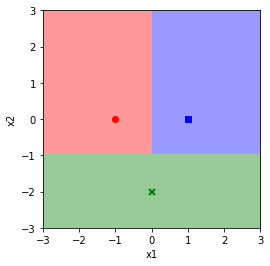

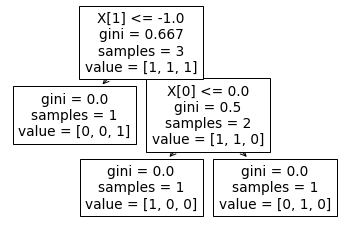

In [4]:
# Train and inspect a small decision tree (3 points, 3 classes)

X = np.array([[-1,  0],
              [ 1,  0],
              [ 0, -2]])
y = np.array([0, 1, 2])

tree = sklearn.tree.DecisionTreeClassifier(random_state=0)
tree.fit(X, y)
print("feature importances:", tree.feature_importances_)

plot_predict(tree)
plot_data(X, y)

plt.figure()
sklearn.tree.plot_tree(tree);

### 3.1b Train and inspect a small random forest (3 points, 3 classes)

Using random_state=0 and n_estimators=3, we see a decision region that still has axis-aligned boundaries, but different from above (3.1a).

feature importances: [0.66666667 0.33333333]


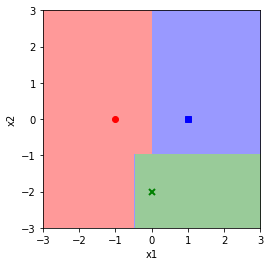

In [5]:
# Train and inspect a small random forest (3 points, 3 classes)

X = np.array([[-1,  0],
              [ 1,  0],
              [ 0, -2]])
y = np.array([0, 1, 2])

forest = sklearn.ensemble.RandomForestClassifier(random_state=0, n_estimators=3)
forest.fit(X, y)
print("feature importances:", forest.feature_importances_)

plot_predict(forest)
plot_data(X, y)

A random forest builds multiple decision trees where each decision tree (each 'estimator') is trained on a different "re-samplings" of the training data. Specifically, decision tree $j$ is trained on a new training set $\mathcal{D}_j$ that is built by sampling $N$ pairs $(\mathbf{x}_i, y_i)$ from the original $N$ training examples in $\mathcal{D}$. The sampling is done "with replacement," meaning that the new training set $\mathcal{D}_j$ may be contain duplicates and/or be missing some of the original data.

With the *random_state* you have chosen, the three re-samplings of $\mathcal{D}=\{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), (\mathbf{x}_3, y_3) \}$ are:
* $\mathcal{D}_1 = \{(\mathbf{x}_1, y_1), (\mathbf{x}_1, y_1), (\mathbf{x}_3, y_3) \}$ (red, red, green).
* $\mathcal{D}_2 = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), (\mathbf{x}_2, y_2) \}$ (red, red, blue).
* $\mathcal{D}_3 = \{(\mathbf{x}_2, y_2), (\mathbf{x}_2, y_2), (\mathbf{x}_3, y_3) \}$ (blue, blue, green).

Each individual decision tree is not a good classifier.
To make a prediction, the random forest collects a prediction from each tree, and returns the class with the most "votes." The winner of these votes tends to be a good classification.


**Plot the decision region and decision tree** for each of the three decision trees that comprise the random forest. 

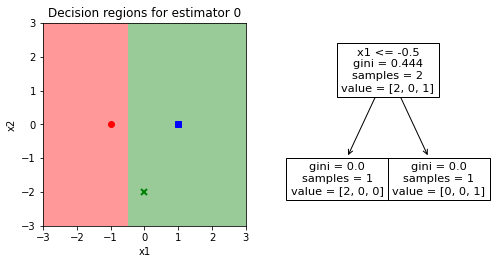

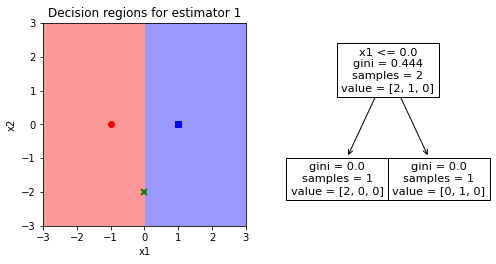

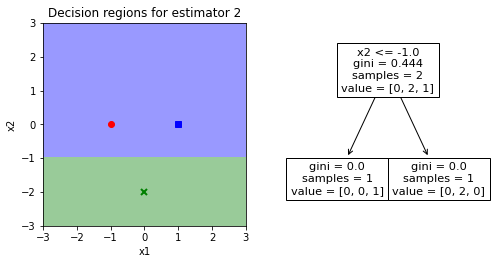

In [5]:
# Plot the decision region and decision tree
# for each of the three decision trees that comprise the random forest

for i, tree in enumerate(forest.estimators_):
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    plot_predict(tree)
    plot_data(X, y)
    plt.title("Decision regions for estimator %d" % i)
    
    plt.subplot(1, 2, 2)
    sklearn.tree.plot_tree(tree, feature_names=['x1', 'x2'])

**Plot the class probabilities** to see how "votes" from the above decision trees are combined by a random forest.

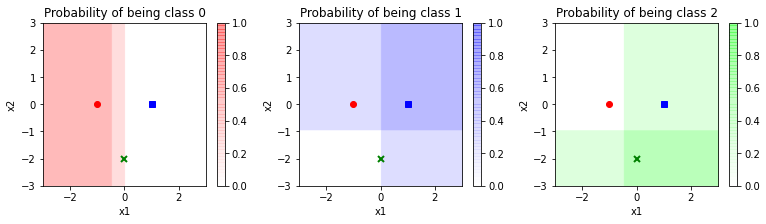

In [6]:
# Plot the class probabilities to see 
# how "votes" from the above decision trees are combined by a random forest

plt.figure(figsize=(13,3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plot_class_probability(forest, i)
    plt.colorbar()
    #plt.imshow(np.ones((1,1,3)), extent=(-3, 3, -3, 3))
    plot_data(X, y)
    #plt.text(-1.9, 1.2, '(fill with probabilities)')
    plt.title("Probability of being class %d" % i)

The plots above illustrate how the three decision trees are combined from a probobility perspective. 

### 3.1c Train and inspect a small random forest on a synthetic pattern

Next, Train a random forest classifier on a synthetic binary classification data set and use the **[sklearn.datasets.make_circles]** function to create two concentric circles.

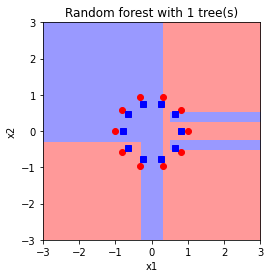

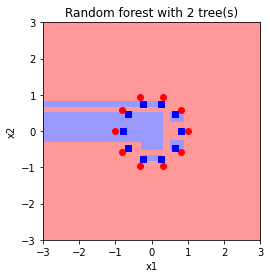

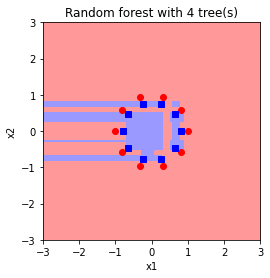

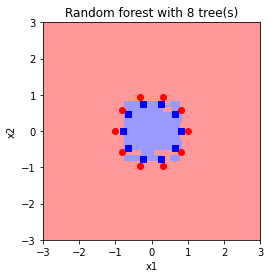

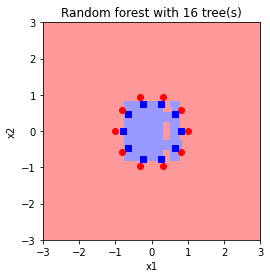

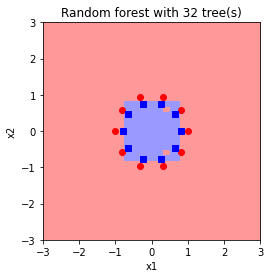

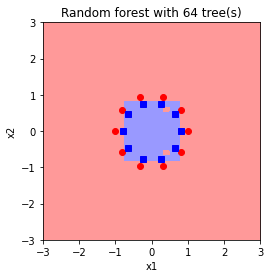

In [7]:
# Generate the circle data, with each circle made from 10 points. Use random_state=0

X, y = sklearn.datasets.make_circles(20, random_state=0)

for i in range(7):
    forest = sklearn.ensemble.RandomForestClassifier(random_state=0, n_estimators=2**i)
    forest.fit(X, y)

    plt.figure()
    plot_predict(forest)
    plot_data(X, y)
    plt.title("Random forest with %d tree(s)" % len(forest.estimators_))

For each *n_estimators* in $\{1, 2, 4, 8, 16, 32, 64\}$, train a random forest (use *random_state*=0) and plot its decision regions.
It shows the correspondence between "more trees" and the quality of the combined decision regions.

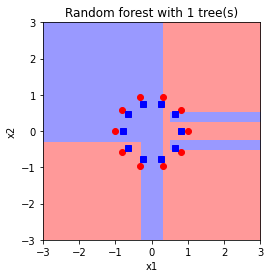

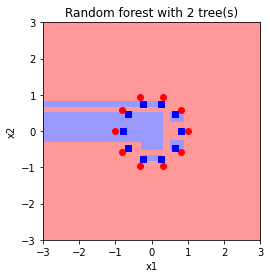

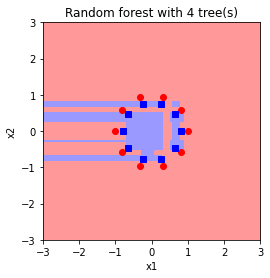

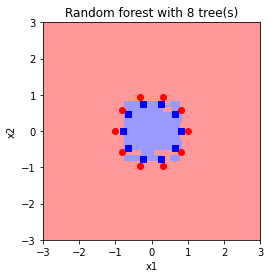

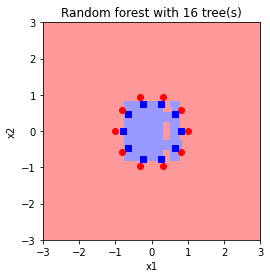

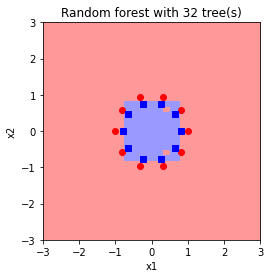

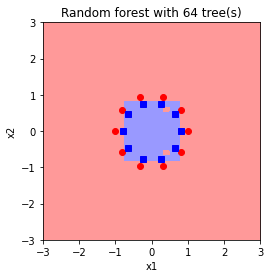

In [8]:
# Your code here. Aim for 8-10 lines.
X, y = sklearn.datasets.make_circles(20, random_state=0)

for i in range(7):
    forest = sklearn.ensemble.RandomForestClassifier(random_state=0, n_estimators=2**i)
    forest.fit(X, y)

    plt.figure()
    plot_predict(forest)
    plot_data(X, y)
    plt.title("Random forest with %d tree(s)" % len(forest.estimators_))

**Plot the class probabilities** of the final random forest (the one with *n_estimators*=64) using the *plot_class_probability* function. 

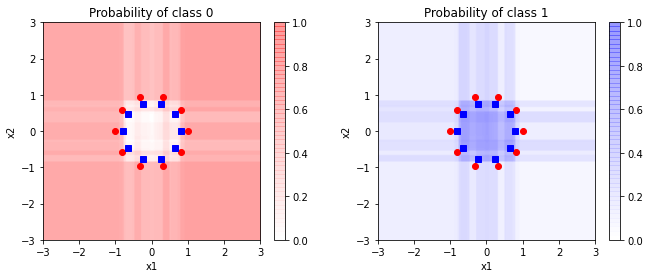

In [9]:
# Plot the class probabilities of the final random forest (the one with n_estimators=64)

plt.figure(figsize=(11, 4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plot_class_probability(forest, i)
    plt.colorbar()
    #plt.imshow(np.ones((1,1,3)), extent=(-3, 3, -3, 3))
    plot_data(X, y)
    #plt.text(-1.5, 2.0, '(fill with probabilities)')
    plt.title("Probability of class %d" % i)

It is found that the class probabilities have axis-aligned structure extending far away from the data even though the decision region is compact.

## <center>Part II. A real data set</center>

In the following, train and evaluate decision tree and random forest classifiers across multiple hyperparameters on a real data set. The basic goal is to predict the absence (0) or presence (1) of heart disease being suffered by the patients using a Random Tree algorithm on 14 physiological attributes. Dataset obtained from: https://www.kaggle.com/ronitf/heart-disease-uci

## Introduction

**Heart Disease Data Set**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Columns:
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect, probably thalassemia 
14. target - 1 or 0

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Load data and libraries:

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz

import pandas_profiling
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
#from sklearn.utils.fixes import signature
from funcsigs import signature
from matplotlib.legend_handler import HandlerLine2D
from pdpbox import pdp, get_dataset, info_plots


%matplotlib inline

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = ["age", "sex", "cp", 
           "trestbps", "chol", "fbs", 
           "restecg", "thalach","exang", 
           "oldpeak","slope", "ca", "thal", "num"]

df = pd.read_csv(path, header=None, names=columns, na_values=['?'])
df['target'] = np.where(df.num > 0, 1, 0)
df.drop('num', inplace=True, axis=1)

df = df.dropna() # 4 records

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Exploratory Data Analysis

"Heart Disease data" is obtained by "pandas_profiling", visuaizing the exploratory analysis of the data.

**WARNING:** The code below can take **a couple of minutes** to finish

In [8]:
pandas_profiling.ProfileReport(df)

### Data preprocessing

#### Check datatypes and convert categorical data to one-hot

In [9]:
pd.DataFrame({"NaN":df.isna().sum(), "datatype":df.dtypes})

,NaN,datatype
age,0,float64
sex,0,float64
cp,0,float64
trestbps,0,float64
chol,0,float64
fbs,0,float64
restecg,0,float64
thalach,0,float64
exang,0,float64
oldpeak,0,float64


In [10]:
#Creation of labels, etc.
labels = df['target']
#df = df.drop('target', axis = 1)

#Using Dummy variables to convert categorical to numeric
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Basic Training (train/test split)

In [12]:
X = df[df.columns[:-1]]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0) 
# test split is 0.2

### Predictive modelling using DecisionTreeClassifier and RandomForest

If a model is able to make accurate predictions on unseen data, we say it is able to generalize from the training set to the test set. We want to build a model that is able to generalize as accurately as possible., Trade-off of model complexity against training and test accuracy.
The more complex we allow our model to be, the better we will be able to predict onbthe training data. However, if our model becomes too complex, we start focusing too much on each individual data point in our training set, and the model will not generalize well to new data. There is a **sweet spot** in between that will yield the best generalization performance, which is we want to find.
![model_complexity](img/overfitting_underfitting_cartoon.png)

##### Train decision trees of different depths
Train multiple decision trees, each with a different *max_depth* parameter, and plot the resulting decision regions and training/test accuracy. The maximum depth of a decision tree controls how finely the tree is allowed to split the feature space before it must predict a class label. A depth of 1 means it is only allowed one split.

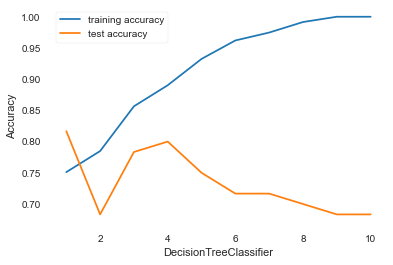

In [13]:
# Train decision trees of different depths

training_accuracy = []
test_accuracy = []

# try depth from 1 to 10
depth_settings = range(1, 11)

for max_depth in depth_settings:
    # build the model
    dtree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    dtree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(dtree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(dtree.score(X_test, y_test))
    
plt.plot(depth_settings, training_accuracy, label="training accuracy")
plt.plot(depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("DecisionTreeClassifier")
plt.legend()

    #print('Decision tree regions (max_depth=%d)' % depth)
    #Accuracy
    #print("Training Accuracy :", dtree.score(X_train, y_train))
    #print("Testing Accuracy :", dtree.score(X_test, y_test))


The optimal depth of DecisionTreeClassifier is around 4 where sweet spot occurs (maximum test accuracy of a decision tree classifier on the data set). 

In [14]:
# fit with training data using DecisionTreeClassifier when max_depth is optimal 
dtree = DecisionTreeClassifier(random_state=0, max_depth=4)
dtree.fit(X_train,y_train)
#Accuracy
print("Training Accuracy :", dtree.score(X_train, y_train))
print("Testing Accuracy :", dtree.score(X_test, y_test))

Training Accuracy : 0.890295358649789
Testing Accuracy : 0.8


**Train random forests of different depths**

This time, train a *RandomForestClassifier* instead of a *DecisionTreeClassifier*. Use *random_state*=0 and *n_estimators*=100.

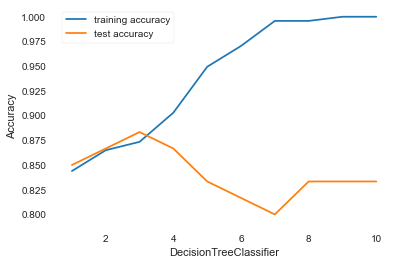

In [15]:
# fit with training data using RandomForestClassifier 

# Train decision trees of different depths

training_accuracy = []
test_accuracy = []

# try depth from 1 to 10
depth_settings = range(1, 11)

for max_depth in depth_settings:
    # build the model
    rfc=RandomForestClassifier(# builing 100 decision trees
                           n_estimators=100,
                          # using gini impurity when building trees
                          criterion="gini",
                          max_depth=max_depth,
                          bootstrap=True,
                          random_state=0)
    
    rfc.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(rfc.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(rfc.score(X_test, y_test))
    
plt.plot(depth_settings, training_accuracy, label="training accuracy")
plt.plot(depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("DecisionTreeClassifier")
plt.legend()


The optimal depth of DecisionTreeClassifier is around 3 where sweet spot occurs (maximum test accuracy of a random forest classifier on the data set). 

In [16]:
# fit with training data using RandomForestClassifier when max_depth is optimal 
rfc=RandomForestClassifier(# builing 100 decision trees
                           n_estimators=100,
                          # using gini impurity when building trees
                          criterion="gini",
                          max_depth=3,
                          bootstrap=True,
                          random_state=0)
rfc.fit(X_train,y_train)
#Accuracy
print("Training Accuracy :", rfc.score(X_train, y_train))
print("Testing Accuracy :", rfc.score(X_test, y_test))

Training Accuracy : 0.8734177215189873
Testing Accuracy : 0.8833333333333333


#### Evaluate training and test accuracy across two hyperparameters

The performance of *RandomForestClassifier* depends on many hyperparameters. Here I'll perform a sweep over *max_depth* and also *n_estimators*.

I'll evaluate the training and test accuracy of *RandomForestClassifier* for every combination of
* *max_depth* $\in \{1, 2, 3, 4, 5, 6, 7, 8, 9,10\}$
* *n_estimators* $ \in \{1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024\}$

The results will be compiled into a two-dimensional ndarray and plotted as a heatmap with properly labeled axes.

**WARNING:** The code below can take **a couple of minutes** to finish

In [19]:
# Evaluate training and test accuracy across two hyperparameters
max_depth_grid = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_estimators_grid = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
accuracies = np.empty((len(max_depth_grid), len(n_estimators_grid), 2))

for i, max_depth in enumerate(max_depth_grid):
    for j, n_estimators in enumerate(n_estimators_grid):
        forest = RandomForestClassifier(random_state=0, max_depth=max_depth, n_estimators=n_estimators)
        forest.fit(X_train, y_train)
        accuracies[i,j,0] = sklearn.metrics.accuracy_score(y_train, forest.predict(X_train))
        accuracies[i,j,1] = sklearn.metrics.accuracy_score(y_test, forest.predict(X_test))

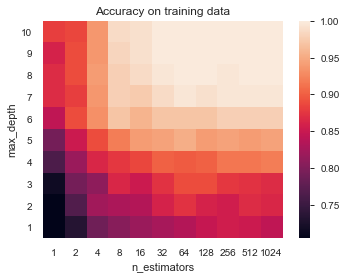

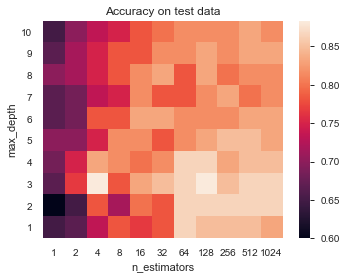

In [20]:
# The results will be compiled into a two-dimensional ndarray and plotted as a heatmap
for i, name in enumerate(['training', 'test']):
    plt.figure()
    plt.imshow(accuracies[:,:,i], origin='lower')
    plt.colorbar();
    plt.xlabel('n_estimators')
    plt.ylabel('max_depth')
    plt.xticks(range(len(n_estimators_grid)), labels=n_estimators_grid)
    plt.yticks(range(len(max_depth_grid)), labels=max_depth_grid)
    plt.title("Accuracy on %s data" % name)

From above heatmaps, it is found that the random forest classifier with the combination(s) of (max_depth>=8, n_estimators>=64) has the highest accuracy on the test data. The accuracy trend on the test data is different than the trend on the training data. The highest accuracy on the test data takes place with the combination(s) of (max_depth=3, n_estimators=128).

In [21]:
# fit with training data using RandomForestClassifier when max_depth is optimal 
rfc=RandomForestClassifier(# builing 100 decision trees
                           n_estimators=128,
                          # using gini impurity when building trees
                          criterion="gini",
                          max_depth=3,
                          bootstrap=True,
                          random_state=0)
rfc.fit(X_train,y_train)
#Accuracy
print("Training Accuracy :", rfc.score(X_train, y_train))
print("Testing Accuracy :", rfc.score(X_test, y_test))

Training Accuracy : 0.890295358649789
Testing Accuracy : 0.8833333333333333


#### Confusion matrix

False == healthy; True == diseased

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        32
           1       0.90      0.64      0.75        28

    accuracy                           0.80        60
   macro avg       0.82      0.79      0.79        60
weighted avg       0.82      0.80      0.79        60



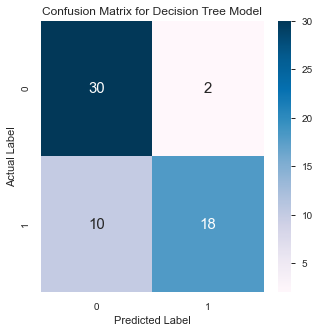

Sensitivity :  0.75
Specificity :  0.9


In [22]:
# Predicted by a decision tree

pred=dtree.predict(X_test)

pred_prob = dtree.predict_proba(X_test)[:, 1]
report = classification_report(y_test, pred)

confusion = confusion_matrix(y_test, pred).T
confusion = pd.DataFrame(
    confusion, 
    index=["pred_health", "pred_diseased"], 
    columns=["health", "diseased"]
)

print("False == healthy; True == diseased\n")
print(report)

#Confusion Matrix
cm = confusion_matrix(y_test, pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')
plt.title('Confusion Matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


#Sensitivity and Specificity
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

#confusion

False == healthy; True == diseased

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



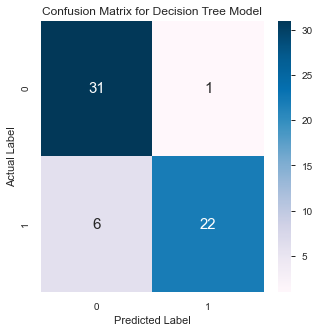

Sensitivity :  0.8378378378378378
Specificity :  0.9565217391304348


In [23]:
# Predicted by RandomForest

pred2=rfc.predict(X_test)

pred_prob2 = rfc.predict_proba(X_test)[:, 1]
report = classification_report(y_test, pred2)

confusion = confusion_matrix(y_test, pred2).T
confusion = pd.DataFrame(
    confusion, 
    index=["pred_health", "pred_diseased"], 
    columns=["health", "diseased"]
)

print("False == healthy; True == diseased\n")
print(report)

#Confusion Matrix
cm = confusion_matrix(y_test, pred2)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')
plt.title('Confusion Matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#Sensitivity and Specificity
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

#confusion

#### Receiver Operating Characteristic Curve

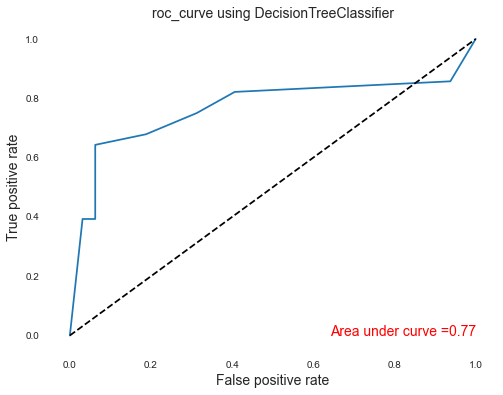

In [24]:
# Predicted by DecisionTreeClassifier
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.plot((0,1), (0,1), linestyle="--", color="k")
plt.xlabel("False positive rate", size=14)
plt.ylabel("True positive rate", size=14)
plt.title("roc_curve using DecisionTreeClassifier", size=14)
plt.text(1, 0, f"Area under curve ={auc(fpr, tpr):.2f}", size=14, ha="right", color="r")
plt.show()

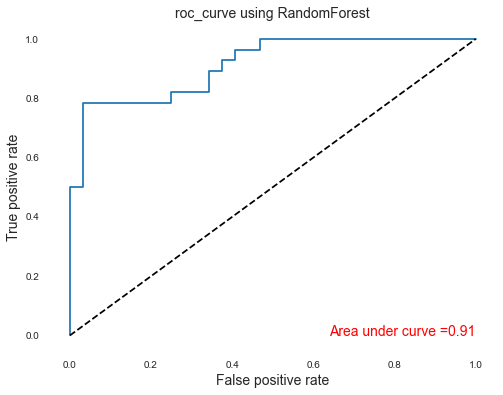

In [25]:
# Predicted by RandomForest
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_prob2)

plt.figure(figsize=(8,6))
plt.plot(fpr2, tpr2)
plt.plot((0,1), (0,1), linestyle="--", color="k")
plt.xlabel("False positive rate", size=14)
plt.ylabel("True positive rate", size=14)
plt.title("roc_curve using RandomForest", size=14)
plt.text(1, 0, f"Area under curve ={auc(fpr2, tpr2):.2f}", size=14, ha="right", color="r")
plt.show()

#### Analysis--ranking features by importance

In [26]:
#imp = pd.DataFrame(rfc.feature_importances_, index=X_test.columns, columns=['importance'])
#imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

perm = PermutationImportance(rfc, random_state = 0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0867 ± 0.0975,thal
0.0600 ± 0.0400,cp
0.0567 ± 0.0806,ca
0.0500 ± 0.0596,exang
0.0433 ± 0.0400,oldpeak
0.0300 ± 0.0389,chol
0.0233 ± 0.0163,slope
0.0167 ± 0.0211,sex
0.0133 ± 0.0133,trestbps
0.0067 ± 0.0163,restecg


### Visualize the trees

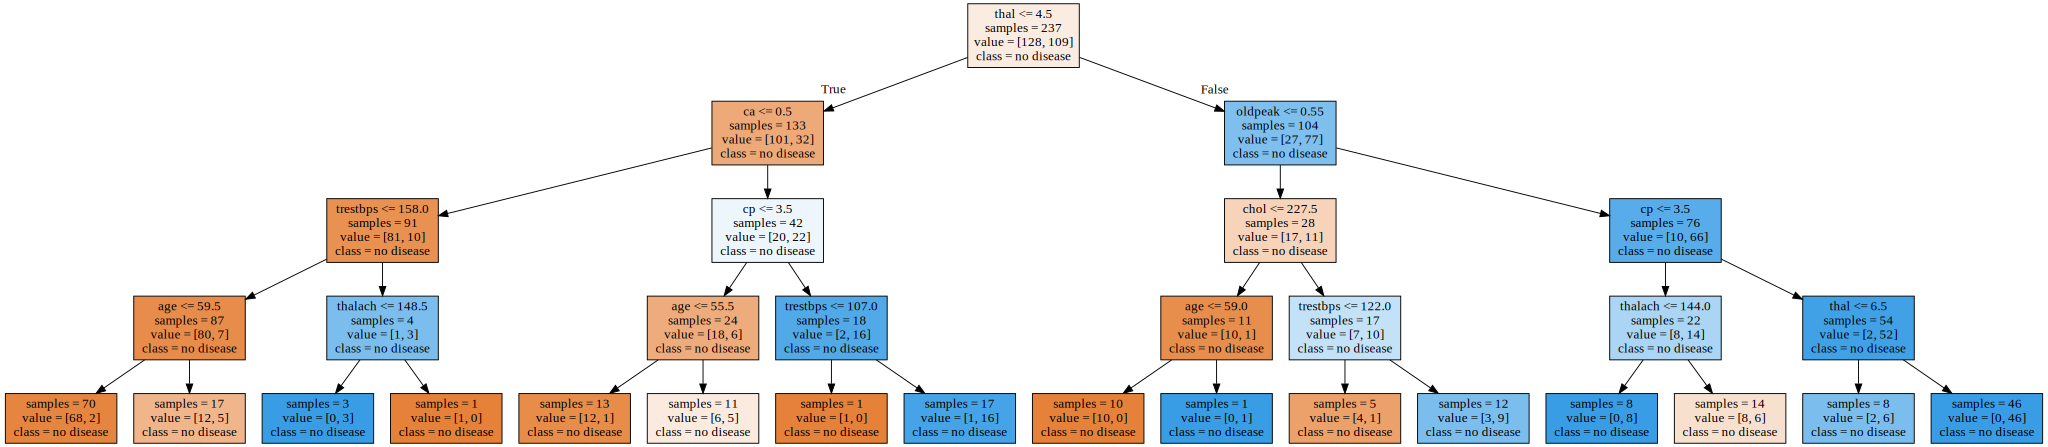

In [27]:
# We can visualize the DecisionTreeClassifier tree using the export_graphviz function from the tree module.
import pydotplus

feature_names = [i for i in X_train.columns]
y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values


export_graphviz(dtree, out_file="tree.dot", 
                feature_names = feature_names,
                class_names = y_train_str,
                impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Specify the figure size
#https://stackoverflow.com/questions/51346827/how-can-i-specify-the-figsize-of-a-graphviz-representation-of-decision-tree/51351199
#dot_data=export_graphviz(dtree, out_file=None, 
                #feature_names = feature_names,
                #class_names = y_train_str,
                #impurity=False, filled=True)


#pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.write_png('original_tree.png')
#pydot_graph.set_size('"5,5!"')
#pydot_graph.write_png('resized_tree.png')

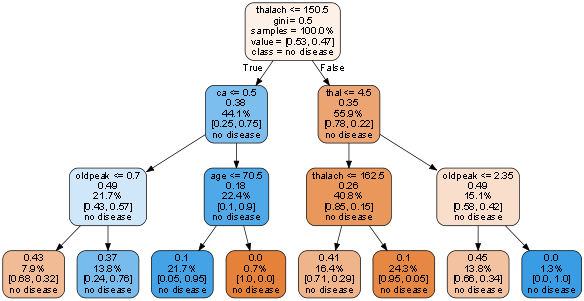

In [28]:
#Display a Tree from RandomForest
#(https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c)

estimator = rfc.estimators_[1]

estimator = rfc.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')

### CONCLUSIONS

It is not supprising that RandomForest outperforms the DecisionTreeClassifier, especially after we tuned the hyperparameter values. On the other hand, as shown by the visualized trees, DecisionTreeClassifier trees are more intuitive, easier to interpret,and the results are paths of rules that humans can understand.

The predictive accuracies with RandomForest are as follows:

Sensitivity :  0.8378378378378378;
Specificity :  0.9565217391304348.

## Bibliography

1. Learning From Data - Online Corse (MOOC)  https://work.caltech.edu/telecourse

2. Hands-On Machine Learning with Scikit-Learn & TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. By Aurélien Géron.

3. Introduction to Machine Learning with Python: A Guide for Data Scientists. By Andreas C. Müller and Sarah Guido.
4. Deep Learning with Python. ByFrançois Chollet.